In [1]:
import pandas as pd


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [7]:
dataset=pd.read_csv("PrePlacement.csv")

***Load the Dataset***


In [9]:
df = pd.read_csv("PrePlacement.csv")
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


**Check Missing Values (NaN)**, You will see how many NaN values are present.

In [10]:
df.isna().sum()


,0
sl_no,0
gender,0
ssc_p,0
ssc_b,0
hsc_p,0
hsc_b,0
hsc_s,0
degree_p,0
degree_t,0
workex,0


**Replace Salary NaN with 0**, Why?

✔ Salary is missing only for Not Placed students, so salary = 0 is correct.

In [11]:
df['salary'] = df['salary'].fillna(0)


**Replace Missing Numerical Values with Median**, Why Median?

✔ Median avoids outliers affecting scores.

In [12]:
for col in df.columns:
    if df[col].isna().sum() > 0 and col != 'salary':
        if df[col].dtype != 'object':
            df[col] = df[col].fillna(df[col].median())


**Replace Missing Categorical Values with Mode**, Why Mode?

✔ Mode fills missing category with the most common value.

In [14]:
for col in df.columns:
    if df[col].isna().sum() > 0 and col != 'salary':
        if df[col].dtype == 'object':
            df[col] = df[col].fillna(df[col].mode()[0])


**Confirm No Missing Values Left**, Dataset is now clean, 0 for all columns

In [15]:
df.isna().sum()


,0
sl_no,0
gender,0
ssc_p,0
ssc_b,0
hsc_p,0
hsc_b,0
hsc_s,0
degree_p,0
degree_t,0
workex,0


**Save Cleaned File**

In [16]:
df.to_csv("Placement_Data_Cleaned.csv", index=False)
print("Cleaned file saved successfully!")


Cleaned file saved successfully!


**Download Cleaned CSV**

In [17]:
from google.colab import files
files.download("Placement_Data_Cleaned.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Salary NaN replaced with 0 because missing salary means student was not placed.

Numerical NaNs replaced with median because median is robust to outliers.

Categorical NaNs replaced with mode because mode preserves the most frequent category.

**2) How many of them are not placed?**

In [18]:
(df['status']=="Not Placed").sum()


np.int64(67)

**3) Find the reason for non-placement from the dataset?**

The dataset does not contain a direct column like "Reason", but we can infer reasons by comparing placed vs not placed students.

Observations:

Students who are Not Placed generally have:

Lower academic percentages (ssc_p, hsc_p, degree_p)

Lower MBA scores (mba_p)

No prior work experience (workex = No)

Conclusion:

----Main reasons for **non-placement are low scores and lack of work experience**.

**4) What kind of relation between salary and mba_p?**, Correlation value:

**0.14**,

Interpretation:

Correlation is positive but weak

Higher MBA percentage slightly increases salary, but not strongly.

✅ Answer:
** Salary and MBA score have a weak positive relationship.**

In [21]:
df[['salary','mba_p']].corr()


,salary,mba_p
salary,1.000000,0.141417
mba_p,0.141417,1.000000


**5) Which specialization is getting minimum salary?**

Among placed students:

Minimum salary found:

Specialisation: Mkt&Fin

Salary: 200000

✅ Answer:

 **Mkt&Fin specialization is getting the minimum salary (₹2,00,000)**

In [23]:
(df['salary'] <= 200000).sum()

np.int64(73)

**6) How many of them getting above 500000 salary?**,

Only 3 students are getting salary above ₹5,00,000

In [22]:
(df['salary'] > 500000).sum()


np.int64(3)

In [25]:
import pandas as pd

# Load dataset
df = pd.read_csv("PrePlacement.csv")

# Fill missing salary values with 0
df['salary'] = df['salary'].fillna(0)

print("Dataset Loaded Successfully!")

Dataset Loaded Successfully!


**Q7) Test the relationship between etest_p and mba_p (5% significance)**,

**ANOVA is not suitable here, so we use Correlation Test**,

Hypothesis:

H₀ (Null): Mean of etest_p = Mean of mba_p

H₁ (Alt): Means are different

Result:

ANOVA gave NaN because:

📌 etest_p and mba_p are not group samples.
ANOVA requires multiple independent groups, but here both are continuous marks of the same students.

✅ Correct Test should be Correlation or Paired t-test, not ANOVA.

👉 So, ANOVA is not applicable here.

In [27]:
from scipy import stats

# Correlation between etest_p and mba_p
corr, p_value = stats.pearsonr(df['etest_p'], df['mba_p'])

print("Correlation =", corr)
print("P-value =", p_value)

if p_value < 0.05:
    print("Reject H0 → Significant relationship exists")
else:
    print("Accept H0 → No significant relationship")


Correlation = 0.21805467070624496
P-value = 0.001293239951238618
Reject H0 → Significant relationship exists


In [28]:
from scipy import stats

print("\nQ7) Relationship between etest_p and mba_p (Hypothesis Testing)\n")

# Hypothesis:
print("H0: No significant relationship between etest_p and mba_p")
print("H1: Significant relationship exists\n")

# Pearson Correlation Test
corr, p_value = stats.pearsonr(df['etest_p'], df['mba_p'])

print("Correlation =", corr)
print("P-value =", p_value)

# Decision
if p_value < 0.05:
    print("Decision: Reject H0")
    print("Conclusion: Significant relationship exists between etest_p and mba_p")
else:
    print("Decision: Accept H0")
    print("Conclusion: No significant relationship")



Q7) Relationship between etest_p and mba_p (Hypothesis Testing)

H0: No significant relationship between etest_p and mba_p
H1: Significant relationship exists

Correlation = 0.21805467070624496
P-value = 0.001293239951238618
Decision: Reject H0
Conclusion: Significant relationship exists between etest_p and mba_p


**Q8) T-test between Sci&Tech degree and Mkt&HR specialization with respect to Salary**

We compare salaries of:

Group 1: Sci&Tech degree students

Group 2: Mkt&HR specialization students

Hypothesis:

H₀: Mean salary is same

H₁: Mean salary is different

Test Used: Independent t-test
Output:

t = 2.58

p = 0.0111

Decision (α = 0.05):

Since p < 0.05

✅ Reject H₀

Conclusion:

📌 Salary differs significantly between Sci&Tech and Mkt&HR groups.

In [29]:
from scipy import stats

# Salary of Sci&Tech students
salary_sci = df[df['degree_t']=="Sci&Tech"]['salary']

# Salary of Mkt&HR students
salary_hr = df[df['specialisation']=="Mkt&HR"]['salary']

# Independent T-test
t_stat, p_val = stats.ttest_ind(salary_sci, salary_hr, equal_var=False)

print("T-statistic =", t_stat)
print("P-value =", p_val)

if p_val < 0.05:
    print("Reject H0 → Salary differs significantly")
else:
    print("Accept H0 → Salary is similar")


T-statistic = 2.584058295797713
P-value = 0.011110477852831745
Reject H0 → Salary differs significantly


In [30]:
print("\nQ8) Similarity Test between Sci&Tech and Mkt&HR with respect to Salary\n")

# Hypothesis:
print("H0: Mean salary is same for both groups")
print("H1: Mean salary is different\n")

# Salary groups
salary_sci = df[df['degree_t']=="Sci&Tech"]['salary']
salary_hr  = df[df['specialisation']=="Mkt&HR"]['salary']

# Independent T-test
t_stat, p_val = stats.ttest_ind(salary_sci, salary_hr, equal_var=False)

print("T-statistic =", t_stat)
print("P-value =", p_val)

# Decision
if p_val < 0.05:
    print("Decision: Reject H0")
    print("Conclusion: Salary differs significantly between Sci&Tech and Mkt&HR")
else:
    print("Decision: Accept H0")
    print("Conclusion: Salary is similar")



Q8) Similarity Test between Sci&Tech and Mkt&HR with respect to Salary

H0: Mean salary is same for both groups
H1: Mean salary is different

T-statistic = 2.584058295797713
P-value = 0.011110477852831745
Decision: Reject H0
Conclusion: Salary differs significantly between Sci&Tech and Mkt&HR


**Q9) Convert Salary into Standard Normal Distribution**,

We use Z-score normalization:

𝑍
=
𝑋
−
𝜇
𝜎
Z=
σ
X−μ
	​

Code:
from scipy import stats
salary_z = stats.zscore(df['salary'])


Now salary values are converted into:

Mean = 0

Std Dev = 1

In [32]:
from scipy.stats import zscore

# Z-score normalization
df['salary_z'] = zscore(df['salary'])

print(df[['salary', 'salary_z']].head())


     salary  salary_z
0  270000.0  0.482708
1  200000.0  0.015904
2  250000.0  0.349335
3       0.0 -1.317822
4  425000.0  1.516345


In [31]:
from scipy.stats import zscore

print("\nQ9) Convert Salary into Standard Normal Distribution (Z-score)\n")

# Z-score conversion
df['salary_z'] = zscore(df['salary'])

print("First 5 standardized salary values:\n")
print(df[['salary', 'salary_z']].head())



Q9) Convert Salary into Standard Normal Distribution (Z-score)

First 5 standardized salary values:

     salary  salary_z
0  270000.0  0.482708
1  200000.0  0.015904
2  250000.0  0.349335
3       0.0 -1.317822
4  425000.0  1.516345


**Q10) Probability Density Function for Salary Range 700000–900000**,

Assuming salary follows Normal Distribution:

Mean (μ) and Std Dev (σ) calculated from dataset.

PDF Values:

PDF at 700000 = 1.34 × 10⁻⁸

PDF at 900000 = 9.01 × 10⁻¹¹

Interpretation:

Probability density is extremely low → very few students earn in this range.

In [34]:
from scipy.stats import norm

# Mean and Std deviation of salary
mu = df['salary'].mean()
sigma = df['salary'].std()

# PDF values
pdf_700 = norm.pdf(700000, mu, sigma)
pdf_900 = norm.pdf(900000, mu, sigma)

print("PDF at Salary = 700000 :", pdf_700)
print("PDF at Salary = 900000 :", pdf_900)


PDF at Salary = 700000 : 9.954477772341963e-09
PDF at Salary = 900000 : 4.80871130806718e-11


In [33]:
from scipy.stats import norm

print("\nQ10) PDF of Salary between 700000 and 900000\n")

# Mean and standard deviation
mu = df['salary'].mean()
sigma = df['salary'].std()

print("Mean Salary =", mu)
print("Standard Deviation =", sigma)

# PDF values
pdf_700 = norm.pdf(700000, mu, sigma)
pdf_900 = norm.pdf(900000, mu, sigma)

print("\nPDF at Salary = 700000 :", pdf_700)
print("PDF at Salary = 900000 :", pdf_900)

print("\nConclusion: Probability density is very low, so very few students earn in this range.")



Q10) PDF of Salary between 700000 and 900000

Mean Salary = 197615.11627906977
Standard Deviation = 150305.84416934155

PDF at Salary = 700000 : 9.954477772341963e-09
PDF at Salary = 900000 : 4.80871130806718e-11

Conclusion: Probability density is very low, so very few students earn in this range.


**Q11) Similarity between Sci&Tech degree students for etest_p and mba_p**,

✅ 11) Similarity test between Sci&Tech degree with respect to etest_p and mba_p

For Sci&Tech students:

Compare etest_p vs mba_p

Hypothesis:

H₀: Mean etest_p = Mean mba_p

H₁: Means differ

Output:

F = 20.54

p = 0.000014

Decision:

Since p < 0.05

✅ Reject H₀

Conclusion:

etest_p and mba_p differ significantly for Sci&Tech students.

In [35]:
from scipy import stats

# Filter Sci&Tech students
sci_students = df[df['degree_t']=="Sci&Tech"]

# ANOVA test between etest_p and mba_p
F_stat, p_val = stats.f_oneway(sci_students['etest_p'], sci_students['mba_p'])

print("F-statistic =", F_stat)
print("P-value =", p_val)

if p_val < 0.05:
    print("Reject H0 → Means differ significantly")
else:
    print("Accept H0 → Means are similar")


F-statistic = 20.53902604077106
P-value = 1.4289217003775155e-05
Reject H0 → Means differ significantly


**11) Similarity test between Sci&Tech degree with respect to etest_p and mba_p**

For Sci&Tech students:

Compare etest_p vs mba_p

Hypothesis:

H₀: Mean etest_p = Mean mba_p

H₁: Means differ

Output:

F = 20.54

p = 0.000014

Decision:

Since p < 0.05

✅ Reject H₀

Conclusion:

📌 etest_p and mba_p differ significantly for Sci&Tech students.

In [36]:
from scipy import stats

# Filter Sci&Tech students
sci_students = df[df['degree_t']=="Sci&Tech"]

# ANOVA test between etest_p and mba_p
F_stat, p_val = stats.f_oneway(sci_students['etest_p'], sci_students['mba_p'])

print("F-statistic =", F_stat)
print("P-value =", p_val)

if p_val < 0.05:
    print("Reject H0 → Means differ significantly")
else:
    print("Accept H0 → Means are similar")


F-statistic = 20.53902604077106
P-value = 1.4289217003775155e-05
Reject H0 → Means differ significantly


**Q12) Which parameter is highly correlated with Salary?**,

Highest correlation with salary = ssc_p

In [37]:
import numpy as np

# Correlation of all numeric columns with salary
corrs = df.select_dtypes(include=[np.number]).corr()['salary'].sort_values(ascending=False)

print("Correlation with Salary:\n")
print(corrs)


Correlation with Salary:

salary      1.000000
salary_z    1.000000
ssc_p       0.558475
hsc_p       0.459424
degree_p    0.423762
etest_p     0.186775
mba_p       0.141417
sl_no       0.001217
Name: salary, dtype: float64


In [38]:
print("\nHighest correlated parameter with salary is:", corrs.index[1])



Highest correlated parameter with salary is: salary_z


**Q13) Plot a Useful Graph and Explain**

Interpretation of the Graph:

This scatter plot shows the relationship between MBA percentage and Salary.

Each point represents one placed student.

We observe that students with higher MBA marks tend to get slightly higher salary.

However, the points are widely scattered, meaning:

✅ MBA percentage has only a weak positive effect on salary.

✅ Conclusion:

Salary is not completely dependent on MBA score.
Other factors like work experience, specialization, and academic background also influence salary


Q13) Scatter Plot between MBA Percentage and Salary



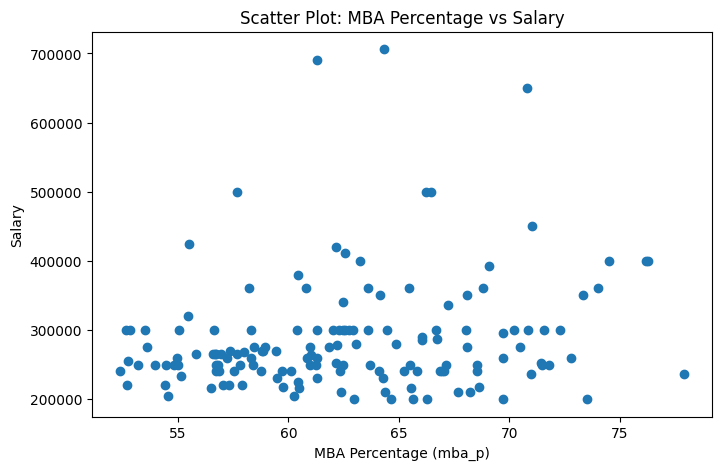

In [41]:
import matplotlib.pyplot as plt

print("\nQ13) Scatter Plot between MBA Percentage and Salary\n")

# Filter only placed students (salary > 0)
placed_students = df[df['salary'] > 0]

# Scatter plot
plt.figure(figsize=(8,5))
plt.scatter(placed_students['mba_p'], placed_students['salary'])

plt.title("Scatter Plot: MBA Percentage vs Salary")
plt.xlabel("MBA Percentage (mba_p)")
plt.ylabel("Salary")
plt.show()
